In [2]:
     #        imports
     #       numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

     #     #estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

     #     #model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

     #     cross validation
from sklearn.model_selection import train_test_split 

In [3]:
credit = pd.read_csv( f"c:\\users\johne\Documents\Purdue DA\------How to Program\Credit_one_C.csv")
#data = data.drop_duplicates()
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,689,3102,3913,0,0,0,0,689,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,default
2,90000,female,university,2,34,0,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,not default
3,50000,female,university,1,37,0,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,35835,5670,8617,679,689,9000,10000,36681,2000,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,male,high school,1,39,0,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,not default
29961,150000,male,high school,2,43,-1,-1,-1,-1,0,...,3502,1828,1683,0,0,129,8998,3526,1837,not default
29962,30000,male,university,2,37,4,3,2,-1,0,...,2758,3356,3565,3100,2000,4200,22000,0,0,default
29963,80000,male,high school,1,41,1,-1,0,0,0,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,default


In [4]:
credit.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_1                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT6                      int64
BILL_AMT5                      int64
BILL_AMT4                      int64
BILL_AMT3                      int64
BILL_AMT2                      int64
BILL_AMT1                      int64
PAY_AMT6                       int64
PAY_AMT5                       int64
PAY_AMT4                       int64
PAY_AMT3                       int64
PAY_AMT2                       int64
PAY_AMT1                       int64
default payment next month    object
dtype: object

In [175]:
# Add three new code variables and delete sex, education, and default payment.
# do this instead of creating 2 or 4 new variables per metric in 'dummies' function

All_data = credit
All_data['gendercode'] = 1
All_data['edcode'] = 1
All_data['defaultcode'] = 1


i=0
#j=0
#k=0

for i in range(len(All_data)):
    if All_data.iloc[i,1] == "female":
        All_data.iloc[i,24]=2


    if All_data.iloc[i,2] == "graduate school":
        All_data.iloc[i,25]=1
    elif All_data.iloc[i,2] == "university":
        All_data.iloc[i,25]=2
    elif All_data.iloc[i,2] == "high school":
        All_data.iloc[i,25]=3
    else:
         All_data.iloc[i,25]=4       

    if All_data.iloc[i,23] == "default":
        All_data.iloc[i,26]=2
            

All_data = All_data.drop(axis=1, columns=['SEX', 'EDUCATION', 'default payment next month'])
All_data

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,...,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,gendercode,edcode,defaultcode
0,20000,1,24,2,2,-1,-1,-2,-2,0,...,3913,0,0,0,0,689,0,2,2,2
1,120000,2,26,-1,2,0,0,0,2,3261,...,2682,2000,0,1000,1000,1000,0,2,2,2
2,90000,2,34,0,0,0,0,0,0,15549,...,29239,5000,1000,1000,1000,1500,1518,2,2,1
3,50000,1,37,0,0,0,0,0,0,29547,...,46990,1000,1069,1100,1200,2019,2000,2,2,1
4,50000,1,57,-1,0,-1,0,0,0,19131,...,8617,679,689,9000,10000,36681,2000,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,39,0,0,0,0,0,0,15980,...,188948,1000,5000,3047,5003,20000,8500,1,3,1
29961,150000,2,43,-1,-1,-1,-1,0,0,0,...,1683,0,0,129,8998,3526,1837,1,3,1
29962,30000,2,37,4,3,2,-1,0,0,19357,...,3565,3100,2000,4200,22000,0,0,1,2,2
29963,80000,1,41,1,-1,0,0,0,-1,48944,...,-1645,1804,52964,1926,1178,3409,85900,1,3,2


In [176]:
header = All_data.dtypes.index
print(header)

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3',
       'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'gendercode', 'edcode',
       'defaultcode'],
      dtype='object')


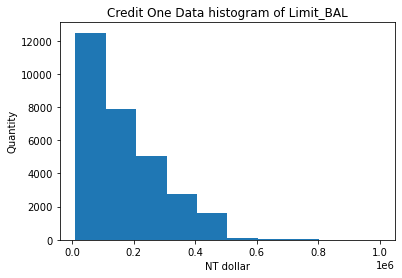

In [119]:
plt.hist(All_data['LIMIT_BAL'], bins=10)
plt.title('Credit One Data histogram of Limit_BAL')
plt.ylabel('Quantity')
plt.xlabel('NT dollar')
plt.show()


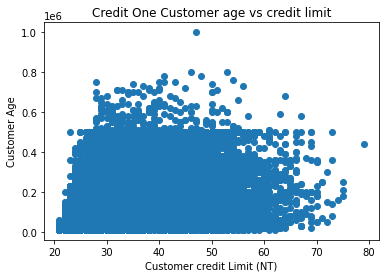

In [122]:
#no corelation age vs limit balance
x = All_data['AGE']
y = All_data['LIMIT_BAL']
plt.scatter(x,y)
plt.title('Credit One Customer age vs credit limit')
plt.ylabel('Customer Age')
plt.xlabel('Customer credit Limit (NT)')
plt.show()

In [12]:
All_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LIMIT_BAL    29965 non-null  int64
 1   MARRIAGE     29965 non-null  int64
 2   AGE          29965 non-null  int64
 3   PAY_1        29965 non-null  int64
 4   PAY_2        29965 non-null  int64
 5   PAY_3        29965 non-null  int64
 6   PAY_4        29965 non-null  int64
 7   PAY_5        29965 non-null  int64
 8   PAY_6        29965 non-null  int64
 9   BILL_AMT6    29965 non-null  int64
 10  BILL_AMT5    29965 non-null  int64
 11  BILL_AMT4    29965 non-null  int64
 12  BILL_AMT3    29965 non-null  int64
 13  BILL_AMT2    29965 non-null  int64
 14  BILL_AMT1    29965 non-null  int64
 15  PAY_AMT6     29965 non-null  int64
 16  PAY_AMT5     29965 non-null  int64
 17  PAY_AMT4     29965 non-null  int64
 18  PAY_AMT3     29965 non-null  int64
 19  PAY_AMT2     29965 non-null  int64
 20  PAY_AM

# Define X and y with LIMIT_BAL as the dependent var "y"

In [112]:

#Create new dataframe of features called "X". Capital X
# Alternative code using iloc instead of loc
#           df2 = credit.iloc[: , [0,1, 2,3]]


X = All_data.loc[:,['MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3',
       'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'gendercode', 'edcode',
       'defaultcode']]
X

,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,BILL_AMT5,...,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,gendercode,edcode,defaultcode
0,1,24,2,2,-1,-1,-2,-2,0,0,...,3913,0,0,0,0,689,0,2,2,2
1,2,26,-1,2,0,0,0,2,3261,3455,...,2682,2000,0,1000,1000,1000,0,2,2,2
2,2,34,0,0,0,0,0,0,15549,14948,...,29239,5000,1000,1000,1000,1500,1518,2,2,1
3,1,37,0,0,0,0,0,0,29547,28959,...,46990,1000,1069,1100,1200,2019,2000,2,2,1
4,1,57,-1,0,-1,0,0,0,19131,19146,...,8617,679,689,9000,10000,36681,2000,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,1,39,0,0,0,0,0,0,15980,31237,...,188948,1000,5000,3047,5003,20000,8500,1,3,1
29961,2,43,-1,-1,-1,-1,0,0,0,5190,...,1683,0,0,129,8998,3526,1837,1,3,1
29962,2,37,4,3,2,-1,0,0,19357,20582,...,3565,3100,2000,4200,22000,0,0,1,2,2
29963,1,41,1,-1,0,0,0,-1,48944,11855,...,-1645,1804,52964,1926,1178,3409,85900,1,3,2


In [113]:
y = All_data['LIMIT_BAL']
y

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29960    220000
29961    150000
29962     30000
29963     80000
29964     50000
Name: LIMIT_BAL, Length: 29965, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
print(len(X_train),len(X_test),len(y_train),len(y_test))

20975 8990 20975 8990


In [16]:


# Try just a single pass through RandomForestRegressor before trying the loop  

algo = RandomForestRegressor(max_depth=4)#, max_features=4)
model = algo.fit(X_train,y_train)
print(model)


RandomForestRegressor(max_depth=4)


In [17]:
preds = model.predict(X_test)
preds

array([253325.91347388,  80629.1831728 , 156489.14499757, ...,
        88143.23469972, 168499.41231208,  80629.1831728 ])

In [18]:
# create dictionary with name as the key and call function as second item.

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass

[('Random Forest Regressor', RandomForestRegressor()),
 ('Linear Regression', LinearRegression()),
 ('Support Vector Regression', SVR())]

In [19]:
# the cv parameter was varied here, using 3 and 5. results were nearly identical, showing this parameter 
# does not impact results for this data.
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=5, scoring='r2') 
    names.append(name)
    results.append(result)
results

[array([0.48015559, 0.46871645, 0.4907653 , 0.45403983, 0.45326735]),
 array([0.36577339, 0.34383162, 0.38961858, 0.35228819, 0.31320713]),
 array([-0.03126026, -0.03606725,  0.00133353, -0.06720367, -0.06821832])]

In [36]:
#results.iloc[1:1]
df = pd.DataFrame(results)
df
q =df.mean(axis=1)
q

0    0.469389
1    0.352944
2   -0.040283
dtype: float64

In [89]:
 
# ******** or do a quick for loop     **********

print(names[0],results[0].mean())
print(names[1],results[1].mean())
print(names[2],results[2].mean(), '\n')

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46734808943344347
Linear Regression 0.3516425384347404
Support Vector Regression -0.05030067612953489 

Random Forest Regressor 0.46734808943344347
Linear Regression 0.3516425384347404
Support Vector Regression -0.05030067612953489


In [71]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

  #  rerun with defaultcode as dependent. 

In [158]:
# re-list all the headers for 24 columns

header = All_data.dtypes.index
print(header)
print(" length of header *number of features* =", len(header))

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3',
       'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'gendercode', 'edcode',
       'defaultcode', 'category'],
      dtype='object')
 length of header *number of features* = 25


In [202]:

#Create new dataframe of features called "X". Capital X
# Alternative code using iloc instead of loc see above for example of loc function with labels - header names. 
#           df2 = credit.iloc[: , [0,1, 2,3]]


X2 = All_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
X2.dtypes

LIMIT_BAL     int64
MARRIAGE      int64
AGE           int64
PAY_1         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT6     int64
BILL_AMT5     int64
BILL_AMT4     int64
BILL_AMT3     int64
BILL_AMT2     int64
BILL_AMT1     int64
PAY_AMT6      int64
PAY_AMT5      int64
PAY_AMT4      int64
PAY_AMT3      int64
PAY_AMT2      int64
PAY_AMT1      int64
gendercode    int64
edcode        int64
dtype: object

In [41]:
y2 = All_data['defaultcode']
y2

0        2
1        2
2        1
3        1
4        1
        ..
29960    1
29961    1
29962    2
29963    2
29964    2
Name: defaultcode, Length: 29965, dtype: int64

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state = 123)
print(len(X2_train),len(X2_test),len(y2_train),len(y2_test))

20975 8990 20975 8990


In [43]:
# create dictionary with name as the key and call function as second item.
# not necessary to duplicate this, does not change from previos run with lim_bal as dependent var.

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass

[('Random Forest Regressor', RandomForestRegressor()),
 ('Linear Regression', LinearRegression()),
 ('Support Vector Regression', SVR())]

In [44]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X2,y2, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
results

dfqq = pd.DataFrame(results)
q2 =dfqq.mean(axis=1)
q2


0    0.183231
1    0.120677
2   -0.085208
dtype: float64

In [45]:
results


[array([0.15654796, 0.20147361, 0.19167078]),
 array([0.10499185, 0.13216996, 0.12486971]),
 array([-0.08992653, -0.09537879, -0.07032016])]

  #  rerun with discretized Limit_Balance, Dependent = defualt code with 4/8 equal sized bins
    

In [7]:
disc_data = All_data
disc_data

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,...,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,gendercode,edcode,defaultcode
0,20000,1,24,2,2,-1,-1,-2,-2,0,...,3913,0,0,0,0,689,0,2,2,2
1,120000,2,26,-1,2,0,0,0,2,3261,...,2682,2000,0,1000,1000,1000,0,2,2,2
2,90000,2,34,0,0,0,0,0,0,15549,...,29239,5000,1000,1000,1000,1500,1518,2,2,1
3,50000,1,37,0,0,0,0,0,0,29547,...,46990,1000,1069,1100,1200,2019,2000,2,2,1
4,50000,1,57,-1,0,-1,0,0,0,19131,...,8617,679,689,9000,10000,36681,2000,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,39,0,0,0,0,0,0,15980,...,188948,1000,5000,3047,5003,20000,8500,1,3,1
29961,150000,2,43,-1,-1,-1,-1,0,0,0,...,1683,0,0,129,8998,3526,1837,1,3,1
29962,30000,2,37,4,3,2,-1,0,0,19357,...,3565,3100,2000,4200,22000,0,0,1,2,2
29963,80000,1,41,1,-1,0,0,0,-1,48944,...,-1645,1804,52964,1926,1178,3409,85900,1,3,2


In [8]:
print("min = ", disc_data["LIMIT_BAL"].min())
print("max = ", disc_data["LIMIT_BAL"].max())

min =  10000
max =  1000000


In [82]:
#pull All_data to enure starting with original, clean data set
disc_data = All_data
category = [1,2,3,4]#,5,6,7,8]

#disc_data['category']=pd.cut(disc_data['LIMIT_BAL'], bins=[0,10000,500000,1000000],labels=category)

#Bin data using cut to keep categories equal in size.   
#disc_data['category']=pd.qcut(disc_data['LIMIT_BAL'], 8)# ,labels=category)#, retbins = True)
disc_data['category']=pd.cut(disc_data['LIMIT_BAL'],8 )#.astype(int)   #, retbins = True)  ,labels=category



#This portion of the next line generates a series with the qcut generated limits: ****pd.value_counts(disc_data['category'])****
#then convert to df for easier manipulation.
Qcategories = pd.DataFrame(pd.value_counts(disc_data['category']))
Qcategories = Qcategories.reset_index()
Qcategories2 = Qcategories.rename(columns={"index" : "Bracket Limit" , "category":'Qty'})
Qcategories2.sort_values("Bracket Limit")

Qcategories2

#disc_data.head(25)

,Bracket Limit,Qty
0,"(9010.0, 133750.0]",14532
1,"(133750.0, 257500.0]",8725
2,"(257500.0, 381250.0]",4460
3,"(381250.0, 505000.0]",2042
4,"(505000.0, 628750.0]",147
5,"(628750.0, 752500.0]",53
6,"(752500.0, 876250.0]",5
7,"(876250.0, 1000000.0]",1


In [72]:
print(Qcategories2.iloc[1,0])

2


In [73]:
# re-list all the headers for 24 columns

header = disc_data.dtypes.index
print(header)
print(" length of header *number of features* =", len(header))

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3',
       'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'gendercode', 'edcode',
       'defaultcode', 'category'],
      dtype='object')
 length of header *number of features* = 25


In [74]:

#Create new dataframe of features called "X3". Capital X
# Alternative code using iloc instead of loc see above for example of loc function with labels - header names. 
#           df2 = credit.iloc[: , [0,1, 2,3]]
#There are 25 features now, with the additional category "column".
#remove LIMIT_BAL and add category.
#verify all integer dtypes


X3 = All_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24]]
X3.dtypes

MARRIAGE      int64
AGE           int64
PAY_1         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT6     int64
BILL_AMT5     int64
BILL_AMT4     int64
BILL_AMT3     int64
BILL_AMT2     int64
BILL_AMT1     int64
PAY_AMT6      int64
PAY_AMT5      int64
PAY_AMT4      int64
PAY_AMT3      int64
PAY_AMT2      int64
PAY_AMT1      int64
gendercode    int64
edcode        int64
category      int32
dtype: object

In [75]:
y3 = All_data['defaultcode']
y3

0        2
1        2
2        1
3        1
4        1
        ..
29960    1
29961    1
29962    2
29963    2
29964    2
Name: defaultcode, Length: 29965, dtype: int64

In [76]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .30, random_state = 123)
print(len(X3_train),len(X3_test),len(y3_train),len(y3_test))

20975 8990 20975 8990


In [77]:
# create dictionary with name as the key and call function as second item.
# not necessary to duplicate this, does not change from previos run with lim_bal as dependent var.

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass

[('Random Forest Regressor', RandomForestRegressor()),
 ('Linear Regression', LinearRegression()),
 ('Support Vector Regression', SVR())]

In [78]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X3,y3, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

#print results and averages
dfqq3 = pd.DataFrame(results)
q3 =dfqq3.mean(axis=1)
q3
print(results,'\n',q3)


#information copied/pasted to Word report.

[array([0.13881863, 0.18721182, 0.18031365]), array([0.10505044, 0.13153271, 0.12390079]), array([-0.09000479, -0.09548017, -0.07135227])] 
 0    0.168781
1    0.120161
2   -0.085612
dtype: float64


#  rerun with discretized Limit_Balance, Dependent = defualt code with 8 equal quantity bins with qcut

In [86]:


#pull All_data to enure starting with original, clean data set
q_disc_data = All_data
category = [1,2,3,4,5,6,7,8]

#disc_data['category']=pd.cut(disc_data['LIMIT_BAL'], bins=[0,10000,500000,1000000],labels=category)

#Bin data using cut to keep categories equal in size.   
#disc_data['category']=pd.qcut(disc_data['LIMIT_BAL'], 8)# ,labels=category)#, retbins = True)
q_disc_data['category']=pd.qcut(q_disc_data['LIMIT_BAL'],8,labels=category).astype(int)   #, retbins = True)  



#This portion of the next line generates a series with the qcut generated limits: ****pd.value_counts(disc_data['category'])****
#then convert to df for easier manipulation.
Qcat = pd.DataFrame(pd.value_counts(disc_data['category']))
Qcat = Qcat.reset_index()
Qcat2 = Qcat.rename(columns={"index" : "Bracket Limit" , "category":'Qty'})
Qcat2.sort_values("Bracket Limit")

Qcat2

#disc_data.head(25)

,Bracket Limit,Qty
0,1,4080
1,6,4074
2,4,3837
3,3,3770
4,2,3593
5,8,3580
6,5,3553
7,7,3478


In [87]:
# re-list all the headers for 24 columns

header = disc_data.dtypes.index
print(header)
print(" length of header *number of features* =", len(header))

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3',
       'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'gendercode', 'edcode',
       'defaultcode', 'category'],
      dtype='object')
 length of header *number of features* = 25


In [88]:
#Create new dataframe of features called "X3". Capital X
# Alternative code using iloc instead of loc see above for example of loc function with labels - header names. 
#           df2 = credit.iloc[: , [0,1, 2,3]]
#There are 25 features now, with the additional category "column".
#remove LIMIT_BAL and add category.
#verify all integer dtypes


X3q = All_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24]]
X3q.dtypes

MARRIAGE      int64
AGE           int64
PAY_1         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT6     int64
BILL_AMT5     int64
BILL_AMT4     int64
BILL_AMT3     int64
BILL_AMT2     int64
BILL_AMT1     int64
PAY_AMT6      int64
PAY_AMT5      int64
PAY_AMT4      int64
PAY_AMT3      int64
PAY_AMT2      int64
PAY_AMT1      int64
gendercode    int64
edcode        int64
category      int32
dtype: object

In [90]:
y3q = All_data['defaultcode']
y3q

0        2
1        2
2        1
3        1
4        1
        ..
29960    1
29961    1
29962    2
29963    2
29964    2
Name: defaultcode, Length: 29965, dtype: int64

In [91]:
X3q_train, X3q_test, y3q_train, y3q_test = train_test_split(X3q, y3q, test_size = .30, random_state = 123)
print(len(X3q_train),len(X3q_test),len(y3q_train),len(y3q_test))

20975 8990 20975 8990


In [92]:
# create dictionary with name as the key and call function as second item.
# not necessary to duplicate this, does not change from previos run with lim_bal as dependent var.

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass

[('Random Forest Regressor', RandomForestRegressor()),
 ('Linear Regression', LinearRegression()),
 ('Support Vector Regression', SVR())]

In [93]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X3,y3, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

#print results and averages
df4 = pd.DataFrame(results)
q4 =df4.mean(axis=1)
q4
print(results,'\n',q4)


#information copied/pasted to Word report.

[array([0.14113399, 0.18897145, 0.17980685]), array([0.10505044, 0.13153271, 0.12390079]), array([-0.09000479, -0.09548017, -0.07135227])] 
 0    0.169971
1    0.120161
2   -0.085612
dtype: float64


#  rerun with reduced independent variables and only RandomForestRegression

In [119]:
red_data = All_data
red_data

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,...,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,gendercode,edcode,defaultcode
0,20000,1,24,2,2,-1,-1,-2,-2,0,...,3913,0,0,0,0,689,0,2,2,2
1,120000,2,26,-1,2,0,0,0,2,3261,...,2682,2000,0,1000,1000,1000,0,2,2,2
2,90000,2,34,0,0,0,0,0,0,15549,...,29239,5000,1000,1000,1000,1500,1518,2,2,1
3,50000,1,37,0,0,0,0,0,0,29547,...,46990,1000,1069,1100,1200,2019,2000,2,2,1
4,50000,1,57,-1,0,-1,0,0,0,19131,...,8617,679,689,9000,10000,36681,2000,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,39,0,0,0,0,0,0,15980,...,188948,1000,5000,3047,5003,20000,8500,1,3,1
29961,150000,2,43,-1,-1,-1,-1,0,0,0,...,1683,0,0,129,8998,3526,1837,1,3,1
29962,30000,2,37,4,3,2,-1,0,0,19357,...,3565,3100,2000,4200,22000,0,0,1,2,2
29963,80000,1,41,1,-1,0,0,0,-1,48944,...,-1645,1804,52964,1926,1178,3409,85900,1,3,2


In [120]:
print(red_data.dtypes.index)

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3',
       'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'gendercode', 'edcode',
       'defaultcode'],
      dtype='object')


In [153]:
X5 = red_data.iloc[:,[9,10,11,12,13,14]]
X5.dtypes.index
independents = X5


In [145]:
y5 = red_data.iloc[:,[23]]
y5.dtypes.index

Index(['defaultcode'], dtype='object')

In [146]:
#multiple versions of this run with varying independent variable (X5)
print(pd.Timestamp.now())

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = .30, random_state = 123)
print(len(X5_train),len(X5_test),len(y5_train),len(y5_test))


algosClass = []
algosClass.append(('RFR',RandomForestRegressor()))
# algosClass.append(('Linear Regression',LinearRegression()))
# algosClass.append(('Support Vector Regression',SVR()))
# algosClass

results = []
names = []
# names = RandomForestRegressor()
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

#print results and averages
df5 = pd.DataFrame(results)
q5 =df5.mean(axis=1)
q5
print(X5.dtypes.index)
print(y5.dtypes.index)
print(results,'\n',q5[0])
print(pd.Timestamp.now())


2022-05-15 11:54:15.506639
20975 8990 20975 8990
[array([0.4703784 , 0.47681483, 0.45241366])] 
 0    0.466536
dtype: float64
2022-05-15 11:55:29.355210


#Classification Analysis with limit_bal as dependent 

In [195]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

label = [1,2,3,4,5,6,7,8]

class_data = []
class_data = All_data
class_data['limitbal'] = pd.qcut(class_data['LIMIT_BAL'], 8, labels =label).astype(int)
class_data


,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,...,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,gendercode,edcode,defaultcode,limitbal
0,20000,1,24,2,2,-1,-1,-2,-2,0,...,0,0,0,0,689,0,2,2,2,1
1,120000,2,26,-1,2,0,0,0,2,3261,...,2000,0,1000,1000,1000,0,2,2,2,4
2,90000,2,34,0,0,0,0,0,0,15549,...,5000,1000,1000,1000,1500,1518,2,2,1,3
3,50000,1,37,0,0,0,0,0,0,29547,...,1000,1069,1100,1200,2019,2000,2,2,1,2
4,50000,1,57,-1,0,-1,0,0,0,19131,...,679,689,9000,10000,36681,2000,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,39,0,0,0,0,0,0,15980,...,1000,5000,3047,5003,20000,8500,1,3,1,6
29961,150000,2,43,-1,-1,-1,-1,0,0,0,...,0,0,129,8998,3526,1837,1,3,1,5
29962,30000,2,37,4,3,2,-1,0,0,19357,...,3100,2000,4200,22000,0,0,1,2,2,1
29963,80000,1,41,1,-1,0,0,0,-1,48944,...,1804,52964,1926,1178,3409,85900,1,3,2,3


In [193]:
Xcl = class_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Xcl.dtypes

MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT6      int64
BILL_AMT5      int64
BILL_AMT4      int64
BILL_AMT3      int64
BILL_AMT2      int64
BILL_AMT1      int64
PAY_AMT6       int64
PAY_AMT5       int64
PAY_AMT4       int64
PAY_AMT3       int64
PAY_AMT2       int64
PAY_AMT1       int64
gendercode     int64
edcode         int64
defaultcode    int64
dtype: object

In [196]:
ycl = class_data.iloc[:,[24]]
ycl.dtypes

limitbal    int32
dtype: object

In [208]:
results = []
Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(Xcl, ycl, test_size = .30, random_state = 123)
result = cross_val_score(DecisionTreeClassifier(max_depth=4, max_features=4), Xcl,ycl, cv=3, scoring='r2')
    
result



array([-0.22033023, -0.03753475, -0.03607338])

In [213]:
bb = pd.DataFrame(result)
aa = bb.mean(axis=0)
aa

0   -0.097979
dtype: float64